# Part I - Loan Data Exploration
## by Ifeanyichukwu Obute

## Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# loan in dataset into a pandas dataframe
loan = pd.read_csv ('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
loan.shape

(113937, 81)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features(including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and many others). Most variables are numeric nd categorical in nature.
### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out which borrower features are best for predicting the highest rate of return.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the total loan amount will have a negative effect on the APR of the loan: the larger the total loan amount, the lower the APR. I also think that the borrowers stated monthly income, loan term, Prosper rating, employment status will also have effects on the APR.

## Univariate Exploration

In [6]:
# Remove loans with missing borrower APR information
loan = loan[~loan.BorrowerAPR.isna()]

Text(0.5,1,'Distribution of Borrower APR')

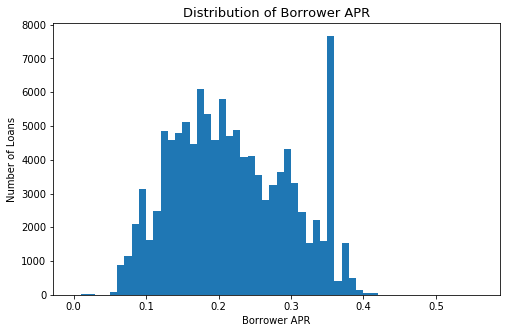

In [7]:
bins = np.arange(0, loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('Number of Loans')
plt.title('Distribution of Borrower APR', size=13)

The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

Text(0.5,1,'Distribution of StatedMonthlyIncome')

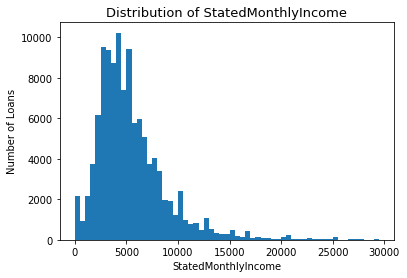

In [8]:
# Distribution of stated monthly income
bins = np.arange(0, 30000, 500)
plt.hist(data = loan, x = 'StatedMonthlyIncome', bins=bins);
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Number of Loans')
plt.title('Distribution of StatedMonthlyIncome', size=13)

The distribution of stated monthly income is severely right screwed, with most of stated monthly income less than 30000.

Text(0.5,1,'Distribution of MonthlyLoanPayment')

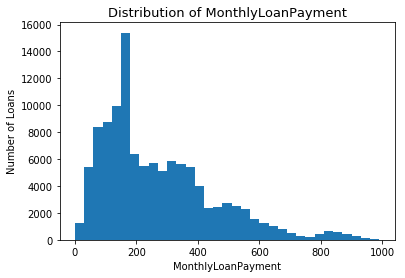

In [10]:
# Distribution of Monthly Loan Payment
bins = np.arange(0, 1000, 30)
plt.hist(data = loan, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('MonthlyLoanPayment');
plt.ylabel('Number of Loans')
plt.title('Distribution of MonthlyLoanPayment', size=13)

From the histogram I found that most of Prosper loan are less than 700, indicates the prospers services are mainly on personal loans.

In [11]:
# check how many 12, 36 and 60
loan.Term.value_counts()

36    87753
60    24545
12     1614
Name: Term, dtype: int64

In [12]:
def chart_order(var):
    '''
    Function to return the order of value_counts() for any column
    '''
    order=loan[var].value_counts().index
    return order

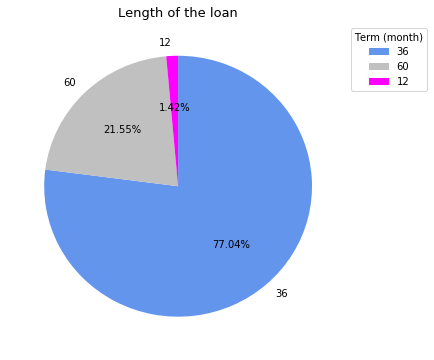

In [13]:
# Draw a donut chart for the length of loan in term of months
plt.figure(figsize=[6, 6])
plt.pie(loan['Term'].value_counts(), labels=chart_order('Term'), colors = ['#6495ED','#C0C0C0','#FF00FF'], 
        startangle=90,counterclock=False,autopct='%1.2f%%')
plt.title('Length of the loan',size=13)
plt.legend(bbox_to_anchor=(1,1),title='Term (month)',loc="upper left");

The length of most of the loans are 36 months.

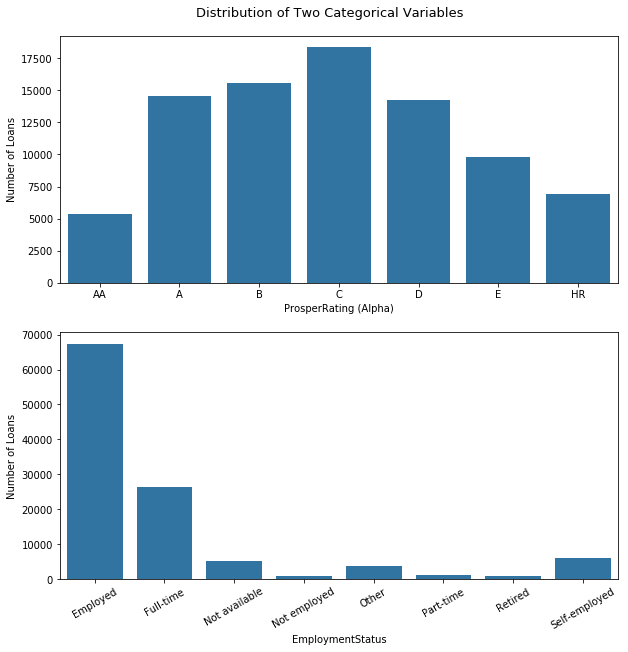

In [14]:
fig, ax = plt.subplots(nrows=2, figsize = [10,10])
fig.suptitle('Distribution of Two Categorical Variables',y = 0.92, x = 0.5,size=13)
default_color = sb.color_palette()[0]
rate_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
em_order = ['Employed', 'Full-time', 'Not available', 'Not employed', 'Other', 'Part-time', 'Retired', 'Self-employed']
ax1 =sb.countplot(data = loan, x = 'ProsperRating (Alpha)', color = default_color, order=rate_order, ax = ax[0])
ax2 =sb.countplot(data = loan, x = 'EmploymentStatus', color = default_color, order=em_order, ax = ax[1]);
ax1.set_xlabel('ProsperRating (Alpha)',size=10)
ax2.set_xlabel('EmploymentStatus',size=10)
ax1.set_ylabel('Number of Loans',size=10)
ax2.set_ylabel('Number of Loans',size=10)
plt.xticks(rotation=30);

The ratings of most of the borrowers are among D to A. Most of borrowers are employed and full-time.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The BorrowerAPR variable took a normal distribution with the peak around 0.2. There is the tranformation of this Borrower APR into the form of percentage for the sake of analysis.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The StatedMonthlyIncome is highly right skewed. Most stated monthly incomes are less than 30000, but some of them are incredibly high, like greater than 100k.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [15]:
# Distinguish two groups of variables
numeric_vars = ['BorrowerAPR', 'StatedMonthlyIncome','MonthlyLoanPayment']
categoric_vars = ['Term', 'ProsperRating (Alpha)','EmploymentStatus']

Text(0.5,1,'Distinguish two groups of variables')

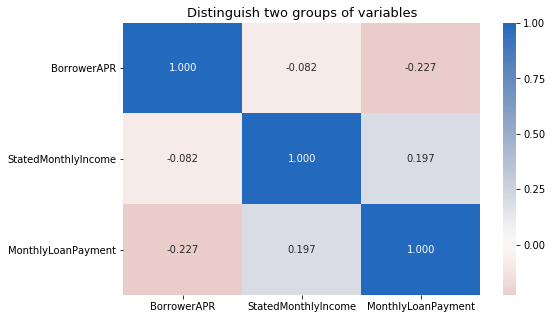

In [16]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title('Distinguish two groups of variables', y = 1, x = 0.5, size = 13)

loan.shape= (113912, 81)
loan_samp.shape= (500, 81)


Text(0.5,1.05,'Distinguish of three numeric variable')

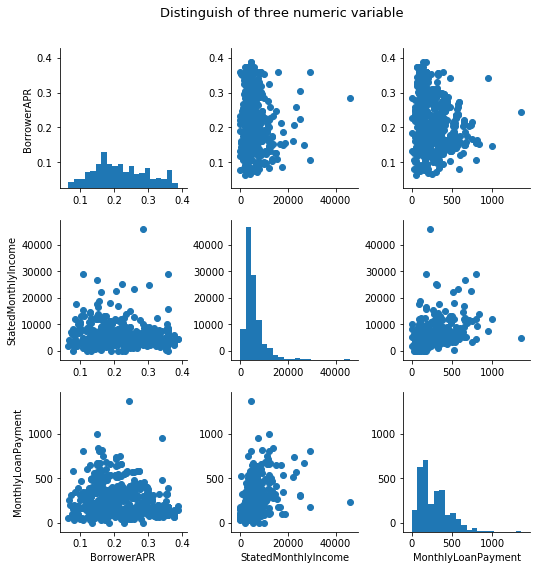

In [17]:
# plot matrix: sample 500 Loan so that plots are clearer and they render faster
print("loan.shape=",loan.shape)
loan_samp = loan.sample(n=500, replace = False)
print("loan_samp.shape=",loan_samp.shape)

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
g.fig.suptitle('Distinguish of three numeric variable',y =1.05, size = 13)

State monthly income and monthly loan payment are positive correlation. These relationships could be explained in the way that customers with more stable monthly income can be approved with monthly loan payment.

Negative correlation between monthly loan payment and borrower APR. These show there are no much streeful in payment of the loan.

Let's move on to looking at how borrower APR and monthly loan payment correlate with the categorical variables.

Text(0.5,1.05,'Distinguish of numeric variable vs categorical variable')

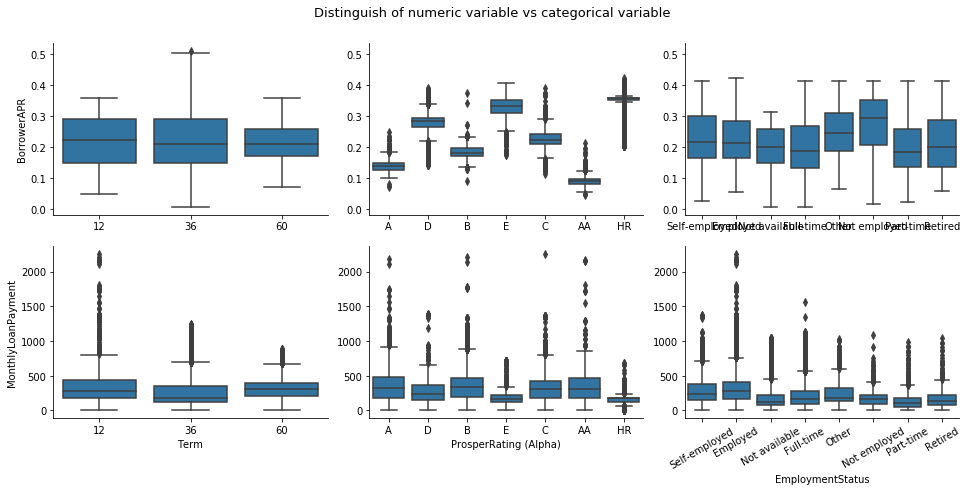

In [18]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan, y_vars = ['BorrowerAPR', 'MonthlyLoanPayment'], 
                x_vars = categoric_vars, size = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);
g.fig.suptitle('Distinguish of numeric variable vs categorical variable',y = 1.05, size = 13)

Employed customers have lower mean interest rate, smaller inner quartile range of Borrower APR and greater original loan amount than the group of unemployed customers. And the monthly loan payment is decreased with the increase of loan term.

Finally, let's look at relationships between the three categorical features.

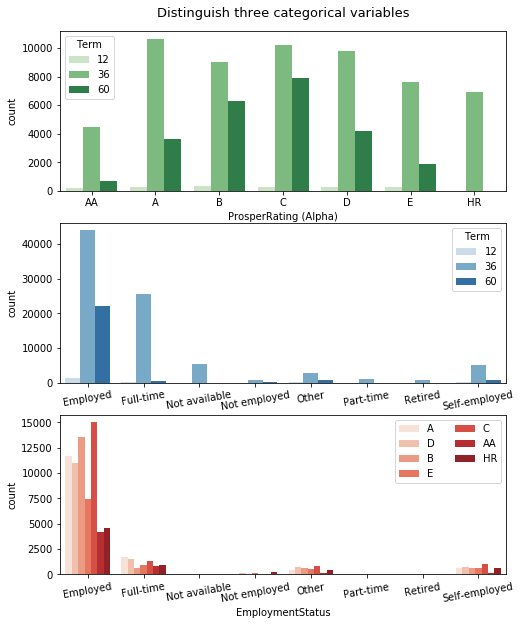

In [19]:
plt.figure(figsize = [8, 10])
em_order = ['Employed', 'Full-time', 'Not available', 'Not employed', 'Other', 'Part-time', 'Retired', 'Self-employed']
# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
rate_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sb.countplot(data = loan, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Greens', order = rate_order)
plt.title('Distinguish three categorical variables', y= 1.05, size = 13)

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues', order = em_order)
plt.xticks(rotation=10)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Reds', order = em_order)
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

There are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

It looks like there appears to be greater proportion of higher income range customers employed of loan term and prosper rating

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The relationship between brower APR and monthly loan payment shows that the two variables are negatively correlated, which agrees with our hypothesis, that is the more the monthly loan payment, the lower the APR

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is a interaction between prosper rating and term. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the categorical variable (Prosper rating and term) play into the relationship between borrower APR and monthly loan payment.

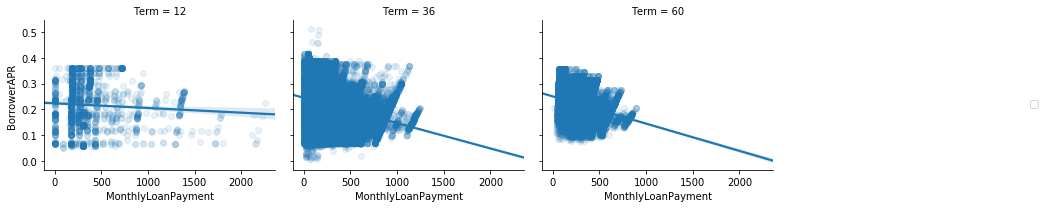

In [20]:
# Term effect on relationship of APR and Loan payment
g=sb.FacetGrid(data=loan, aspect=1.2, col='Term', col_wrap=4)
g.map(sb.regplot, 'MonthlyLoanPayment', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

Term doesn't seem to have effect on relationship of APR and loan payment

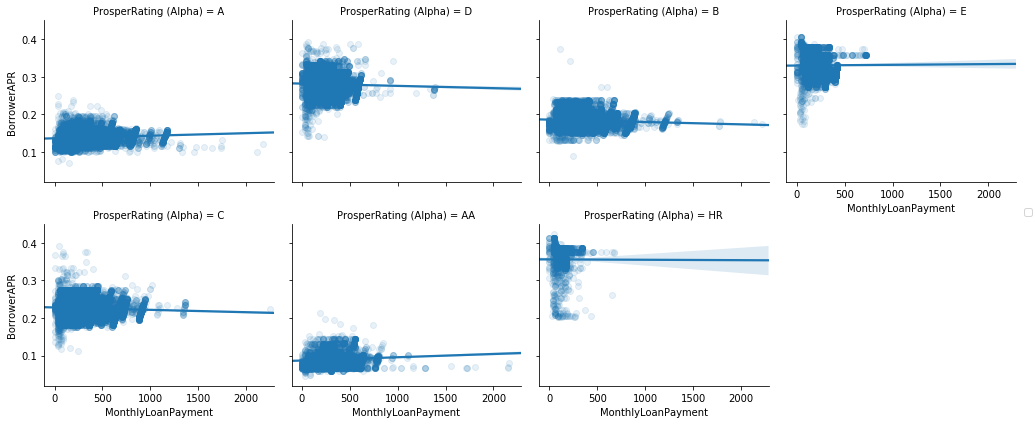

In [21]:
# Prosper rating effect on relationship of APR and loan payment
g=sb.FacetGrid(data=loan, aspect=1.2, col='ProsperRating (Alpha)', col_wrap=4 )
g.map(sb.regplot, 'MonthlyLoanPayment', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

The loan payment increases with better rating. The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan payment turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

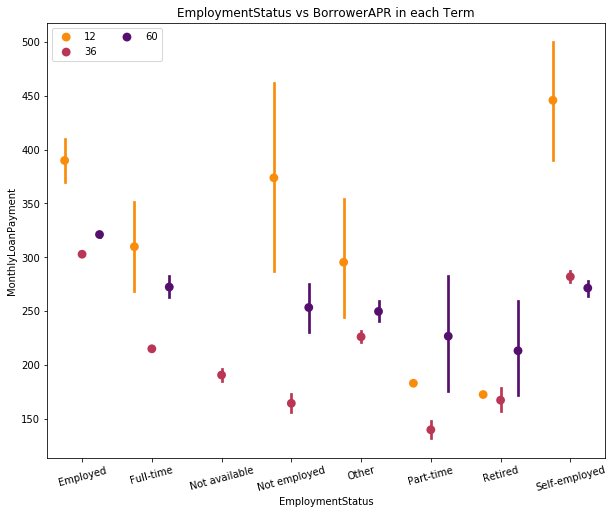

In [22]:
# EmploymentStatus vs BorrowerAPR in each Term
em_order = ['Employed', 'Full-time', 'Not available', 'Not employed', 'Other', 'Part-time', 'Retired', 'Self-employed']
fig = plt.figure(figsize = [10,8])
sb.pointplot(data = loan, x = 'EmploymentStatus', y = 'MonthlyLoanPayment', hue = 'Term', linestyles = "",
                  dodge = 0.5, palette = 'inferno_r', order = em_order )
plt.title('EmploymentStatus vs BorrowerAPR in each Term')
plt.ylabel('MonthlyLoanPayment')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();

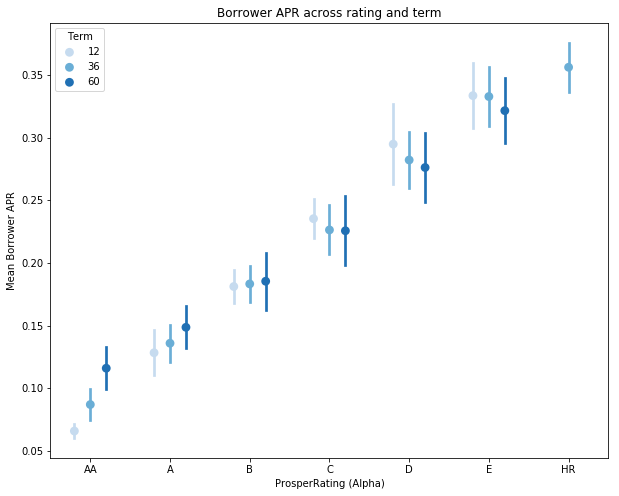

In [23]:
fig = plt.figure(figsize = [10,8])
rate_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ax = sb.pointplot(data = loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd', order = rate_order)
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

Interestingly, the borrower APR increase with the increase of borrow term for the raings.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of borrower APR against loan payment by looking at the impact of the Prosper rating. The multivariate exploration showed that the relationship between borrower APR and loan payment turns from negative to slightly positive when the Prosper ratings increased from HR to AA.

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

